## IMDB DATASET SENTIMENT ANALYSIS


### Import Libraries

In [99]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Set style for plot
from matplotlib import style
style.use('ggplot')

#
import re

# text data
import nltk

# Tokenization
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

# Stemming and Lemmatization
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Stopword Removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) # Set the stopping words to English

# Clouding wordcloud
from wordcloud import WordCloud,STOPWORDS

# Text feature extraction and convert a collection of text documents into a numerical representation
from sklearn.feature_extraction.text import CountVectorizer

# Text feature extraction using the Term Frequency-Inverse Document Frequency (TF-IDF) representation. 
# TF-IDF is a numerical statistic that reflects the importance of a word in a document within a collection or corpus of documents.
from sklearn.feature_extraction.text import TfidfVectorizer

#  Label binarization or one-hot encoding on categorical labels
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder





from bs4 import BeautifulSoup
import spacy 
import re,string,unicodedata


from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
import warnings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load dataset

In [144]:
df = pd.read_csv(r"D:\IMDB Dataset.csv")

### Data preprocessing

In [225]:
# The first 5 rows
df.head()

,review,sentiment
0,one of the other review ha mention that after ...,1
1,a wonder littl production. <br /><br />the fil...,1
2,i thought thi wa a wonder way to spend time on...,1
3,basic there' a famili where a littl boy (jake)...,0
4,"petter mattei' ""love in the time of money"" is ...",1


In [227]:
# The last 5 rows
df.tail()

,review,sentiment
49995,i thought thi movi did a down right good job. ...,1
49996,"bad plot, bad dialogue, bad acting, idiot dire...",0
49997,i am a cathol taught in parochi elementari sch...,0
49998,i'm go to have to disagre with the previou com...,0
49999,no one expect the star trek movi to be high ar...,0


In [147]:
# Find the number of columns and rows
print("The number of rows:", df.shape[0]) 
print("The number of columns:", df.shape[1])

The number of rows: 50000
The number of columns: 2


In [148]:
# Find the number of missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [149]:
print("Are there missing values?", df.isnull().values.any())

Are there missing values? False


In [150]:
# Find the overall statistical summary of the dataset. Understand the distribution of data and identify any missing values and outliers
# For numerical columns only
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [151]:
# Overall statistical summary 
# For the whole dataset(numerical and categorical columns)
df.describe(include='all')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [152]:
# Find the number of rows and columns,datatypes for every column, and the memory size for the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [153]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [155]:
# Find the number of duplicates
duplicated = df.duplicated().sum()
print("The number of duplicates : ",duplicated)


The number of duplicates :  418


In [157]:
# Sentiment column Count
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Distribution of Sentiment')

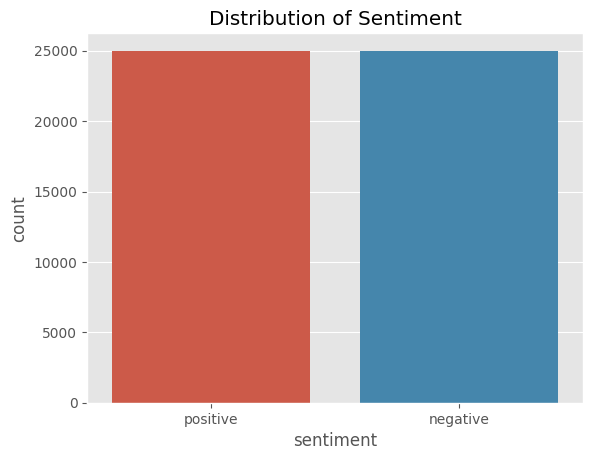

In [158]:
# Visualize sentiment
sns.countplot(x = 'sentiment', data = df)
plt.title("Distribution of Sentiment")

In [159]:
# View the unique values in the sentiment column
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [59]:
# Count the number of words for reviews


In [160]:

df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [161]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### Text Preprocessing

#### Stemming
Removing a word to its root form

In [162]:
#Stemming the text
stemmer = nltk.porter.PorterStemmer()
def simple_stemmer(text):
    
    text= ' '.join([stemmer.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review'] = df['review'].apply(simple_stemmer)

#### Removing stop words
removing common words that do not add much meaning to the text, such as "the", "of", and "and".

In [163]:
# Print the stopwords
print(stop_words)

# Removing the stopwords
stopword = nltk.corpus.stopwords.words('english')
tokenizer = ToktokTokenizer()


def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


{'in', 'them', 'same', "mustn't", 'own', "she's", 'between', 'an', 'hers', 'y', 'only', 'very', 'why', 'aren', 'through', 'there', 'myself', 'she', 'yourselves', "weren't", 'don', 'of', 'yourself', 'while', 'themselves', 'o', 'had', 'into', 'mightn', "needn't", 's', 'his', 'any', 'ain', 'i', 'himself', 'its', "you'll", 'been', 'doing', 'because', 'just', "that'll", 'at', 'it', 'now', 'was', 'you', 'these', 'about', 't', 'by', 'but', 'here', 'couldn', 'as', "mightn't", "shan't", "don't", 'mustn', 'him', 'over', 'he', 'or', "you're", 'my', 'where', 'not', "doesn't", 'so', 'to', "aren't", 'all', 'their', 've', 'and', 'out', 'her', 'hadn', 'do', 'doesn', 'yours', 'on', "it's", 'both', 're', 'ours', 'herself', "should've", 'll', "couldn't", "didn't", 'shouldn', "wasn't", 'didn', "you've", 'ourselves', 'having', 'if', 'did', "haven't", 'has', 'd', 'we', 'what', 'be', 'isn', 'above', 'won', 'again', 'down', 'being', 'before', "isn't", 'am', 'weren', 'under', 'further', 'hasn', "hasn't", 'whom

#### Noise removal
removing noise from the text, such as typos, grammatical errors, and punctuation marks.

In [164]:
def noise_removal(df):
    # Remove punctuation marks
    df = df.replace(',', ' ')
    df = df.replace('.', ' ')
    df = df.replace(';', ' ')
    df = df.replace('!', ' ')
    df = df.replace('?', ' ')
    df = df.replace('"', ' ')
    df = df.replace('(', ' ')
    df = df.replace(')', ' ')
    df = df.replace('-', ' ')

    # Remove HTML tags
    df = re.sub(r'<.*?>', '', df)

#### Wordcloud to visualize positive and negative reviews

In [165]:
# Filter the positive reviews
positive = df[df.sentiment == 1]
positive.head()

,review,sentiment
0,one of the other review ha mention that after ...,1
1,a wonder littl production. <br /><br />the fil...,1
2,i thought thi wa a wonder way to spend time on...,1
4,"petter mattei' ""love in the time of money"" is ...",1
5,"probabl my all-tim favorit movie, a stori of s...",1


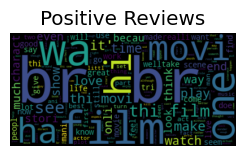

In [166]:
# Create word cloud for positive reviews
text = ' '.join(positive['review'])
positive_wordcloud = WordCloud().generate(text)

# Plotting the word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')
plt.show()

In [167]:
negative = df[df.sentiment == 0]
negative.head()

,review,sentiment
3,basic there' a famili where a littl boy (jake)...,0
7,"thi show wa an amazing, fresh & innov idea in ...",0
8,encourag by the posit comment about thi film o...,0
10,phil the alien is one of those quirki film whe...,0
11,i saw thi movi when i wa about 12 when it came...,0


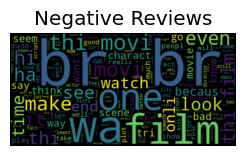

In [168]:
# Create word cloud for negative reviews
text = ' '.join(negative['review'])
negative_wordcloud = WordCloud().generate(text)

# Plotting the word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')
plt.show()

In [184]:
df.columns

Index(['review', 'sentiment'], dtype='object')

### Bag of Word model

In [185]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

#transformed train reviews
cv_train_reviews=cv.fit_transform(df['review'])

#transformed test reviews
cv_test_reviews=cv.transform(df['review'])

print('w_cv_train:',cv_train_reviews.shape)
print('w_cv_test:',cv_test_reviews.shape)



w_cv_train: (50000, 7158711)
w_cv_test: (50000, 7158711)


#### Term Frequency-Inverse Document Frequency model (TFIDF) vectorization

In [204]:
#Tfidf vectorizer
t=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

#transformed train reviews
t_train_reviews=t.fit_transform(df['review'])

#transformed test reviews
t_test_reviews=t.transform(df['review'])
print('Tfidf_train_reviews:',t_train_reviews.shape)
print('Tfidf_test_reviews:',t_test_reviews.shape)

Tfidf_train: (50000, 7158711)
Tfidf_test: (50000, 7158711)


### Label encoding

In [209]:
#labeling the sentient data
lb=LabelBinarizer()

#transformed sentiment data
sentiment_df=lb.fit_transform(df['sentiment'])
print(sentiment_df.shape)

#Spliting the sentiment data
train_sentiments=sentiment_df[:50000]
test_sentiments=sentiment_df[50000:]
print(train_sentiments)
print(test_sentiments)

(50000, 1)
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
[]


In [197]:
# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [199]:
print(y_train_encoded)
print(y_test_encoded)

[0 0 1 ... 0 1 1]
[1 1 0 ... 1 0 0]


### Train Model

In [210]:
#training the model
mb = MultinomialNB()

#fitting the svm for bag of words
mb_w = mb.fit(cv_train_reviews,train_sentiments)
print(mb_w)

#fitting the svm for tfidf features
mb_tfidf=mb.fit(t_train_reviews,train_sentiments)
print(mb_tfidf)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


### Check the performance of the nodel

In [211]:
#Predicting the model for bag of words
mb_w_predict = mb.predict(cv_test_reviews)
print(mb_w_predict)

#Predicting the model for tfidf features
mb_tfidf_predict = mb.predict(t_test_reviews)
print(mb_tfidf_predict)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


### Accuracy score

In [216]:
#Accuracy score for bag of words
mb_w_score = accuracy_score(train_sentiments,mb_w_predict)
print("mb_w_score :",mb_w_score)

#Accuracy score for tfidf features
mb_tfidf_score = accuracy_score(train_sentiments,mb_tfidf_predict)
print("mb_tfidf_score :",mb_tfidf_score)

mb_w_score : 0.99518
mb_tfidf_score : 0.99518


### Classification report

In [218]:
#Classification report for bag of words 
mb_w_report = classification_report(train_sentiments,mb_w_predict,target_names=['Positive','Negative'])
print(mb_w_report)

#Classification report for tfidf features
mb_tfidf_report = classification_report(train_sentiments,mb_tfidf_predict,target_names=['Positive','Negative'])
print(mb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.99      1.00      1.00     25000
    Negative       1.00      0.99      1.00     25000

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

              precision    recall  f1-score   support

    Positive       0.99      1.00      1.00     25000
    Negative       1.00      0.99      1.00     25000

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



### Confusion Matrix

In [219]:
#confusion matrix for bag of words
cmatrix_bow = confusion_matrix(train_sentiments,mb_w_predict,labels=[1,0])
print(cmatrix_bow)

[[24759   241]
 [    0 25000]]


In [220]:
#confusion matrix for tfidf features
cmatrix_tfidf = confusion_matrix(train_sentiments,mb_tfidf_predict,labels=[1,0])
print(cmatrix_tfidf)

[[24759   241]
 [    0 25000]]
